**Корректность проверена на Python 3.7:**
+ scipy 1.1.0
+ numpy 1.14.5

# Биномиальный критерий для доли

In [19]:
import numpy as np
from scipy import stats

In [20]:
import scipy
print(numpy.__version__)
print(scipy.__version__)

1.22.3
1.8.0


In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Shaken, not stirred

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведём слепой тест (blind test): $n$ раз предложим ему пару напитков и выясним, какой из двух он предпочитает. Получаем: 
* **выборка:** бинарный вектор длины $n$, где 1 — Джеймс Бонд предпочел взболтанный напиток, 0 — смешанный;
* **гипотеза $H_0$:** Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $T$:** количество единиц в выборке.

Если нулевая гипотеза справедлива и Джеймс Бонд действительно выбирает наугад, то мы можем с одинаковой вероятностью получить любой из $2^n$ бинарных векторов длины $n$. 

Мы могли бы перебрать все такие векторы, посчитать на каждом значение статистики $T$ и получить таким образом её нулевое распределение. Но в данном случае этот этап можно пропустить: мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(p)$. Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора взболтанного мартини равна $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Пусть $n=16.$

In [22]:
n = 16
F_H0 = stats.binom(n, 0.5)

In [23]:
F_H0.pmf(x)

array([1.52587891e-05, 2.44140625e-04, 1.83105469e-03, 8.54492188e-03,
       2.77709961e-02, 6.66503906e-02, 1.22192383e-01, 1.74560547e-01,
       1.96380615e-01, 1.74560547e-01, 1.22192383e-01, 6.66503906e-02,
       2.77709961e-02, 8.54492188e-03, 1.83105469e-03, 2.44140625e-04,
       1.52587891e-05])

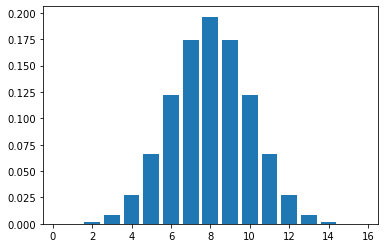

In [24]:
x = np.linspace(0,16,17)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(-0.5, 16.5) 
pylab.show()

## Односторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает взболтанный мартини.

При такой альтернативе более вероятны большие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом хвосте распределения.

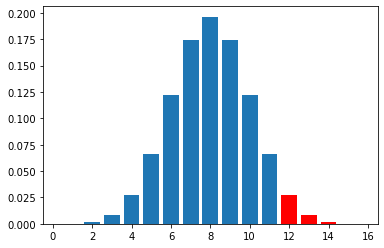

In [25]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [26]:
stats.binom_test(12, 16, 0.5, alternative = 'greater')

0.0384063720703125

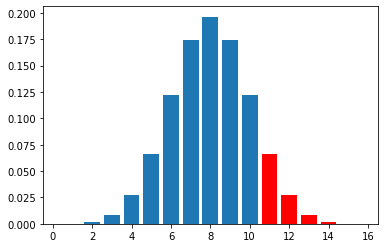

In [27]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(11,16,6), F_H0.pmf(np.linspace(11,16,6)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [28]:
stats.binom_test(11, 16, 0.5, alternative = 'greater')

0.1050567626953125

## Двусторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает какой-то определённый вид мартини.

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

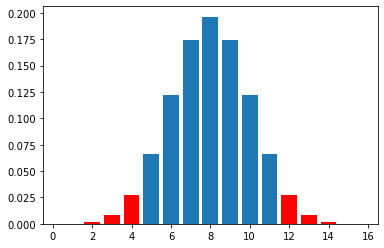

In [29]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
pylab.bar(np.linspace(0,4,5), F_H0.pmf(np.linspace(0,4,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [30]:
stats.binom_test(12, 16, 0.5, alternative = 'two-sided')

0.076812744140625

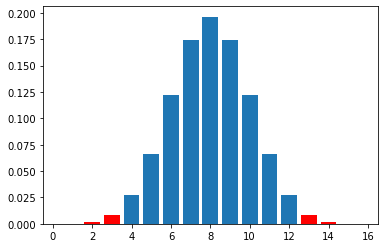

In [31]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(13,16,4), F_H0.pmf(np.linspace(13,16,4)), align = 'center', color='red')
pylab.bar(np.linspace(0,3,4), F_H0.pmf(np.linspace(0,3,4)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [32]:
stats.binom_test(13, 16, 0.5, alternative = 'two-sided')

0.021270751953125

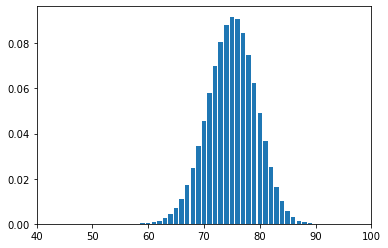

In [73]:
n = 100
F_H0 = stats.binom(n, 0.75)
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(40, 100) 
pylab.show()

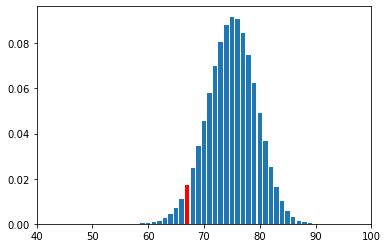

In [74]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(67,100,101), F_H0.pmf(np.linspace(67,100,101)), align = 'center', color='red')
xlim(40, 100) 
pylab.show()

In [75]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386612

In [43]:
stats.binom_test(22, 50, 0.75, alternative = 'greater')

0.9999992802012696

In [47]:
import pandas as pd
df = pd.read_table('pines.txt')

In [48]:
df.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [49]:
import numpy as np
from scipy import stats
  
x = df['sn'].values
y = df['we'].values
z = np.arange(200)
  
# mean
print ("\nbinned_statistic_2d for mean : ", 
       stats.binned_statistic_2d(x, y, values = z,
                   statistic ='count', bins = [5, 5])) 


binned_statistic_2d for mean :  BinnedStatistic2dResult(statistic=array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]]), x_edge=array([  0.,  40.,  80., 120., 160., 200.]), y_edge=array([  0.,  40.,  80., 120., 160., 200.]), binnumber=array([36, 36, 36, 36, 37, 37, 37, 37, 36, 36, 36, 29, 30, 29, 30, 29, 29,
       29, 29, 29, 22, 22, 22, 22, 22, 29, 30, 30, 23, 23, 22,  8,  8,  8,
        8,  8,  8,  8, 15, 15,  8, 15, 15,  9,  9,  9,  9,  9,  9,  9,  9,
        8,  8,  9,  9,  9,  8,  8,  8,  8,  9,  9, 16, 16, 17, 16, 17, 17,
       17,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 17, 17, 10, 10, 10, 10,
       10, 10, 10, 24, 24, 23, 23, 23, 23, 24, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 30, 23, 23, 23, 23, 30, 30, 23, 23, 30, 30, 31, 30, 30,
       30, 22, 22, 22, 15, 22, 22, 22, 15, 15, 16, 16, 15, 15, 15, 15, 15,
       15, 15, 38, 38, 38, 38, 38, 38, 38, 38, 

In [50]:
d = stats.binned_statistic_2d(x, y, values = z,
                   statistic ='count', bins = [5, 5])

In [63]:
m = mean(d.statistic)

In [60]:
r = stats.uniform.rvs(size=(5,5), )

In [69]:
expected_frequences = random.uniform(low=0.0, high=200.0, size=(584))
expected_frequences

array([1.05942474e+02, 1.15637261e+02, 1.86461505e+02, 1.10374550e+02,
       9.16415780e+01, 3.75346616e+01, 1.25672192e+02, 1.93012809e+02,
       1.46004816e+02, 8.87636181e+01, 1.00058753e+02, 7.00335618e+01,
       5.14352173e+01, 8.73362307e+01, 1.93216680e+02, 1.42768539e+02,
       7.02722699e+01, 1.55999269e+02, 3.32074412e+01, 1.99489537e+02,
       8.25781978e+01, 1.91120884e+02, 1.38943764e+02, 1.34804978e+02,
       1.45338456e+02, 1.05766304e+02, 1.50687560e+02, 1.95794142e+02,
       2.00072220e+01, 1.09082306e+02, 2.27055824e+01, 5.79995072e+01,
       8.43575930e+01, 4.68809700e+01, 1.58317471e+02, 8.02136388e+01,
       8.95511562e+01, 8.59284518e+01, 7.61284924e+01, 1.55660281e+02,
       1.27132909e+01, 1.59455802e+02, 1.07322333e+02, 9.20824088e+00,
       7.28381194e+01, 1.52425697e+02, 1.66742712e+02, 9.23890182e+01,
       3.28824281e+01, 2.66126919e+01, 1.71782922e+02, 1.65934600e+02,
       4.78766108e+01, 6.54196077e+01, 4.32991311e+00, 1.46254527e+02,
      

In [66]:
stats.chisquare(d.statistic, expected_frequences, ddof = 1)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
[0.97966102 0.31235955 0.14726027 0.59246575 0.00689655]

In [67]:
sum(d.statistic)

584.0

In [68]:
sum(expected_frequences)

584.0

In [71]:
import matplotlib.pylab as plt

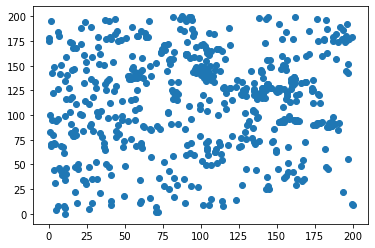

In [72]:
plt.scatter(x, y)